## Biodiversity Index Prediction Using Multiple Linear Regression

This analysis aims at building an Ordinary Least Square (OLS) model to determine how other variables influence **Biodiversity Index** in a country.

## The dataset

The `environmental_indicators` dataset is used in this analysis. The dataset contains socio-economic and environmental data collected from various countries, focusing on factors related to sustainable development. It includes information such as forest coverage, biodiversity index, protected areas, rural population, and deforestation rates, aimed at understanding the relationship between human activities and land degradation.

The following are the descriptions of the columns in our dataset: 

* `country`: Name of the country.
* `forest_coverage`: Percentage of land covered by forests. This indicator represents the extent of forested areas within the total land area of each country.
* `biodiversity_index`: Index representing the biodiversity level in each country. This indicator provides a measure of the variety and variability of organisms within each country's ecosystem.
* `protected_areas`: Percentage of land designated as protected areas. This indicator reflects the proportion of land that is legally protected and managed for conservation purposes.
* `deforestation_rate`: Annual rate of deforestation (%). This indicator quantifies the percentage of forested land that is lost each year due to deforestation activities.
* `carbon_sequestration`: Amount of carbon sequestered by forests (metric tons per hectare). This indicator measures the capacity of forests to absorb and store carbon dioxide from the atmosphere, thus helping mitigate climate change.
* `soil_erosion`: Rate of soil erosion (tons per hectare per year). This indicator indicates the amount of soil that is lost or displaced annually due to erosion, which can have detrimental effects on land productivity and ecosystem health.
* `land_degradation`: Percentage of land classified as degraded. This indicator represents the proportion of land that has suffered a decline in its ecological condition, often resulting from unsustainable land use practices.
* `rural_population`: Percentage of population living in rural areas. This indicator reflects the proportion of a country's population residing in rural areas rather than urban centers.
* `population_density`: Population density (people per square kilometer). This indicator quantifies the average number of people living within a unit area of land, providing insights into the distribution of human populations across different countries.

## Importing libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence as ssoi

## Preparing data

In [3]:
# Read the data
environmental_indicators = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/enviro_indicators.csv', index_col=0)
environmental_indicators.head(10)

,forest_coverage,biodiversity_index,protected_areas,deforestation_rate,carbon_sequestration,soil_erosion,land_degradation,rural_population,population_density
Country,,,,,,,,,
Vietnam,36.217808,6.505159,14.832708,36.583106,53.128459,7.987880,55.020903,35.912142,468.715839
Guinea-Bissau,76.550001,94.888554,23.994363,123.384939,279.836286,13.013811,41.655073,34.639379,351.054600
Bosnia and Herzegovina,61.239576,96.563203,9.932348,115.743745,237.834951,13.037065,26.951490,78.380633,289.329973
Lesotho,51.906094,80.839735,33.076894,111.752369,149.948515,11.179719,27.460479,43.585863,57.616482
Indonesia,20.921305,30.461377,7.609273,46.450326,103.939415,2.715506,46.297784,73.522793,311.353541
Singapore,20.919616,9.767211,39.541043,25.249501,201.926827,16.870747,54.855513,57.868318,495.126387
Saint Lucia,14.065853,68.423303,32.028567,76.130581,474.309367,7.094821,54.354321,67.688678,78.641167
Turkmenistan,70.632330,44.015249,11.955049,73.358093,195.441319,4.543852,48.993777,50.158226,263.981530
Kenya,52.078051,12.203823,5.193274,36.843972,283.455780,1.774728,42.101582,54.614233,439.912805


In [4]:
# check for rows containing missing data
environmental_indicators.isnull().sum()

forest_coverage         0
biodiversity_index      0
protected_areas         0
deforestation_rate      0
carbon_sequestration    0
soil_erosion            0
land_degradation        0
rural_population        0
population_density      0
dtype: int64

In [5]:
# exclude non-numeric columns
numeric_set = environmental_indicators.select_dtypes(include=[np.number])

<Figure size 1400x500 with 0 Axes>

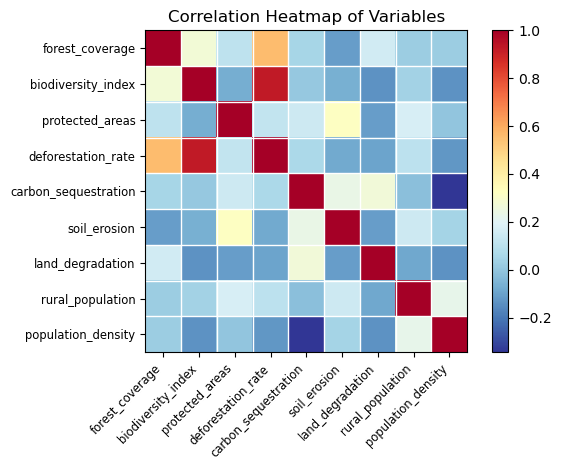

In [10]:
# check for correlation between variables
corr_matrix = numeric_set.corr()

# create a heatmap for the correlation matrix 
plt.figure(figsize=(14,5))
sgc.plot_corr(corr_matrix, xnames=corr_matrix.columns)
plt.title("Correlation Heatmap of Variables")
plt.show()

The heatmap shows correlation exists between the following variables:
1. forest_coverage and deforestation_rate 
2. forest_coverage and biodiversity_index
3. biodiversity_index and deforestation_rate
4. protected_areas and soil_erosion
5. carbon_sequestration and land_degradation 
6. carbon_sequestration and soil_erosion

## Building and fitting model

In [15]:
# declaring independent and dependent variables
independent_cols =['forest_coverage', 'protected_areas',
       'deforestation_rate', 'carbon_sequestration', 'soil_erosion',
       'land_degradation', 'rural_population', 'population_density']

dependent_var = 'biodiversity_index'

In [16]:
# geberate the regression string 
formula_str = dependent_var + '~' + '+'.join(independent_cols)
formula_str

'biodiversity_index~forest_coverage+protected_areas+deforestation_rate+carbon_sequestration+soil_erosion+land_degradation+rural_population+population_density'

In [19]:
# declare and fit model
model = smf.ols(formula=formula_str, data=environmental_indicators)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     biodiversity_index   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     85.25
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.99e-15
Time:                        12:09:31   Log-Likelihood:                -101.24
No. Observations:                  32   AIC:                             220.5
Df Residuals:                      23   BIC:                             233.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2536 

The chart shows that the most influential coefficients are forest_coverage, protected_areas, deforestation_rate, soil_erosion, and rural_population. Inorder to address the issue of multicollinearity, select only these independent variables to build a new model.

In [21]:
select_independent_cols = ['forest_coverage', 'protected_areas', 'deforestation_rate', 'soil_erosion', 'rural_population']

# generate string
formula_str = dependent_var+ '~' +'+'.join(select_independent_cols)
formula_str

'biodiversity_index~forest_coverage+protected_areas+deforestation_rate+soil_erosion+rural_population'

In [23]:
# declare model and fit it 
model = smf.ols(formula=formula_str, data=environmental_indicators)

fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     biodiversity_index   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     146.1
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           3.59e-18
Time:                        12:20:19   Log-Likelihood:                -102.07
No. Observations:                  32   AIC:                             216.1
Df Residuals:                      26   BIC:                             224.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.4728      4